In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fpylll import *

In [2]:
FPLLL.set_random_seed(42)

(n, m) = (2, 2)
A = IntegerMatrix(m, n)
A.randomize("uniform", bits=2)
print(A)

[ 1 1 ]
[ 3 1 ]


## gram schmidt

In [3]:
M = GSO.Mat(A, flags=GSO.INT_GRAM); _ = M.update_gso()
print(M.int_gram_enabled)
print(M.get_mu(1,0))
print(M.G)

True
2.0
[ 2  0 ]
[ 4 10 ]


In [4]:
O = np.zeros((m,n))

for i in range(2):
    O[i] = A[i]
    for j in range(2):
        #print((i,j))
        #print(M.get_mu(i,j))
        #print()
        O[i] = O[i] - M.get_mu(i,j)
        
print(O)

[[ 1.  1.]
 [ 1. -1.]]


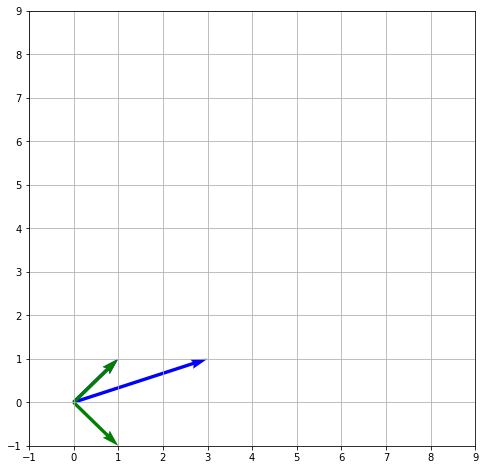

In [5]:
numpyA = np.array([elt for elt in A])

fig = plt.figure(figsize=(8,8))
V = numpyA
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b','b'], angles='xy', scale_units='xy', scale=1)

V = O
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['g','g'], angles='xy', scale_units='xy', scale=1)

plt.xticks(range(-1, 10))
plt.yticks(range(-1, 10))
plt.grid()
plt.show()

## LLL

In [6]:
LLL.is_reduced(A)

False

In [7]:
W = LLL.Wrapper(A)
W()
LLL.is_reduced(A)
print(A)

[ 1  1 ]
[ 1 -1 ]


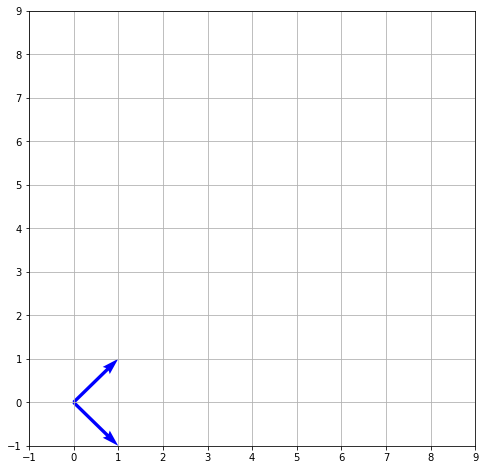

In [8]:
numpyA = np.array([elt for elt in A])

fig = plt.figure(figsize=(8,8))
V = numpyA
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, V[:,0], V[:,1], color=['b','b'], angles='xy', scale_units='xy', scale=1)

plt.xticks(range(-1, 10))
plt.yticks(range(-1, 10))
plt.grid()
plt.show()

## Enumeration

In [9]:
A = IntegerMatrix.from_matrix([[3, 1],[4,2]])
A.randomize("uniform", bits=2)

FPLLL.set_random_seed(42)
_ = FPLLL.set_threads(1)
A = IntegerMatrix(2, 2)
A.randomize("uniform", bits=3)
_ = LLL.reduction(A)
M = GSO.Mat(A)
_ = M.update_gso()
pruning = Pruning.run(M.get_r(0, 0), 2**40, M.r()[:30], 0.8)
enum = Enumeration(M, nr_solutions=1, strategy=EvaluatorStrategy.BEST_N_SOLUTIONS, sub_solutions=True)
#enum = Enumeration(M, strategy=EvaluatorStrategy.FIRST_N_SOLUTIONS, sub_solutions=True)
enum.enumerate(first=0, last=2, max_dist=0.999*M.get_r(0, 0), max_dist_expo=2, target=None, subtree=None, pruning=None, dual=False, subtree_reset=False)
#solutions = enum.enumerate(0, 2, 0.999*M.get_r(0, 0), 0)#, pruning=pruning.coefficients)
[(length, coefVec)] = enum.enumerate(first=0, last=2, max_dist=0.999*M.get_r(0, 0), max_dist_expo=1, target=None, subtree=None, pruning=None, dual=False, subtree_reset=False)#, pruning=pruning.coefficients)
print([length, coefVec[0]*np.array(A[0]) + coefVec[1]*np.array(A[1])])

[(int(round(a)), b) for a,b in enum.sub_solutions]

[2.0, array([1., 1.])]


[]

In [10]:
shortestVector = np.array([0.]*2)
for i in range(len(coefVec)):
    shortestVector += coefVec[i]*np.array(A[i])
    
shortestVector

array([1., 1.])

In [11]:
FPLLL.set_random_seed(42)
_ = FPLLL.set_threads(1)
A = IntegerMatrix(2, 2)
A.randomize("uniform", bits=3)

print(A)
print(LLL.is_reduced(A))
print()
LLL.reduction(A)
print(A)
print(LLL.is_reduced(A))
print()
print()

for elt in A:
    print(elt)
    print(np.linalg.norm(elt, ord=2))

[ 1 1 ]
[ 7 1 ]
False

[ 1  1 ]
[ 3 -3 ]
True


(1, 1)
1.4142135623730951
(3, -3)
4.242640687119285


In [12]:
enum.get_nodes()

2

In [13]:
help(Enumeration)

Help on class Enumeration in module fpylll.fplll.enumeration:

class Enumeration(builtins.object)
 |  Methods defined here:
 |  
 |  __reduce__ = __reduce_cython__(...)
 |      Enumeration.__reduce_cython__(self)
 |  
 |  __setstate__ = __setstate_cython__(...)
 |      Enumeration.__setstate_cython__(self, __pyx_state)
 |  
 |  enumerate(self, first, last, max_dist, max_dist_expo, target, subtree, pruning, dual, subtree_reset)
 |      Enumeration.enumerate(self, int first, int last, max_dist, max_dist_expo, target=None, subtree=None, pruning=None, dual=False, subtree_reset=False)
 |      Run enumeration on `M`
 |      
 |              :param int first:      first row
 |              :param int last:       last row (exclusive)
 |              :param max_dist:       length bound
 |              :param max_dist_expo:  exponent of length bound
 |              :param target:         target coordinates for CVP/BDD or ``None`` for SVP
 |              :param subtree:
 |              :param pru